This notebook synthesizes and saves EEG-like data in a CDR-friendly format.

We are testing here whether an N400-like response is recoverable by CDR(NN).

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import synthesize_n400 as syn

In [4]:
SAMPLE_RATE = 128
# mean, sigma params for a log-normal surprisal distribution
SURPRISAL_PARAMS = (2, 0.2)

N400_SURPRISAL_COEF = -1.

## Inspect `simple_peak` function

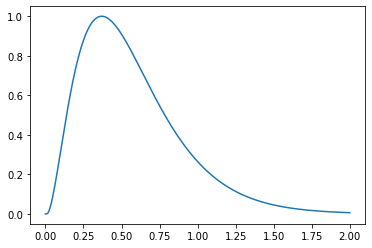

In [5]:
tmax = 2.0
xs = np.linspace(0, tmax, num=int(np.ceil(SAMPLE_RATE * (tmax - 0))))
plt.plot(xs, syn.simple_peak(xs))

## Look at a basic simulated trajectory

In [6]:
X, y = syn.sample_item()

In [7]:
X

,time,surprisal
0,0.437500,6.671590
1,1.250000,7.880244
2,2.242188,7.866347
3,2.851562,8.950505
4,3.507812,8.928757
5,4.460938,10.675026
6,4.828125,9.217331
7,5.726562,8.320457
8,6.281250,6.532621
9,6.765625,4.327937


In [8]:
y

,time,signal
0,0.000000,0.000000
1,0.007812,0.000000
2,0.015625,0.000000
3,0.023438,0.000000
4,0.031250,0.000000
...,...,...
1947,15.210938,-0.084237
1948,15.218750,-0.081594
1949,15.226562,-0.079033
1950,15.234375,-0.076550


<AxesSubplot:label='803cdc8a-42b2-4208-b0b8-f9ef8c7940e3', xlabel='time', ylabel='surprisal'>

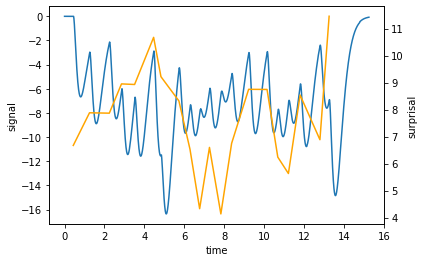

In [9]:
sns.lineplot(data=y, x="time", y="signal")
sns.lineplot(data=X, x="time", y="surprisal", color="orange", ax=plt.twinx())

## Phoneme surprisal

In [10]:
X, y = syn.sample_word()

<AxesSubplot:label='213b87a4-6b99-4c16-b4cb-d38c3cded7af', xlabel='time', ylabel='surprisal'>

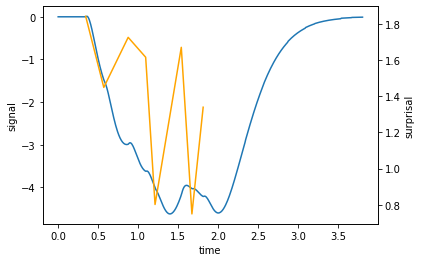

In [11]:
sns.lineplot(data=y, x="time", y="signal")
sns.lineplot(data=X, x="time", y="surprisal", color="orange", ax=plt.twinx())

In [12]:
X_word, X_phon, y = syn.sample_item_with_phons(10, n400_surprisal_coef=-0.1)

In [13]:
X_phon

time  surprisal
word_idx phon_idx                      
0        0          0.187500   2.856421
1        0          1.390625   1.349443
         1          1.546875   2.575150
         2          1.718750   1.769871
         3          1.984375   1.728886
         4          2.328125   3.081644
         5          2.476562   2.208074
         6          2.781250   1.703738
         7          2.960938   0.940851
         8          3.312500   1.916367
         9          3.414062   1.497457
2        0          4.125000   1.863656
         1          4.234375   0.581091
         2          4.359375   1.667452
3        0          5.367188   0.923030
         1          5.468750   1.555992
         2          5.710938   0.605351
         3          5.843750   2.246993
         4          5.953125   1.605877
         5          6.101562   2.129044
         6          6.226562   2.084995
         7          6.335938   2.218437
4        0          6.843750   1.044299
5        0          7.726562   2.057337
         1          7.953125   1.610264
         2          8.210938   1.400605
         3          8.343750   1.738311
         4          8.585938   0.749312
6        0          9.203125   1.634257
7        0          9.695312   1.887585
         1          9.882812   1.422118
         2         10.039062   1.150543
         3         10.328125   1.399824
         4         10.609375   2.562343
         5         10.835938   1.562278
8        0         11.820312   1.268195
         1         11.921875   1.154892
9        0         12.632812   1.306286
         1         12.804688   1.457722
         2         13.007812   1.577229
         3         13.296875   2.464219

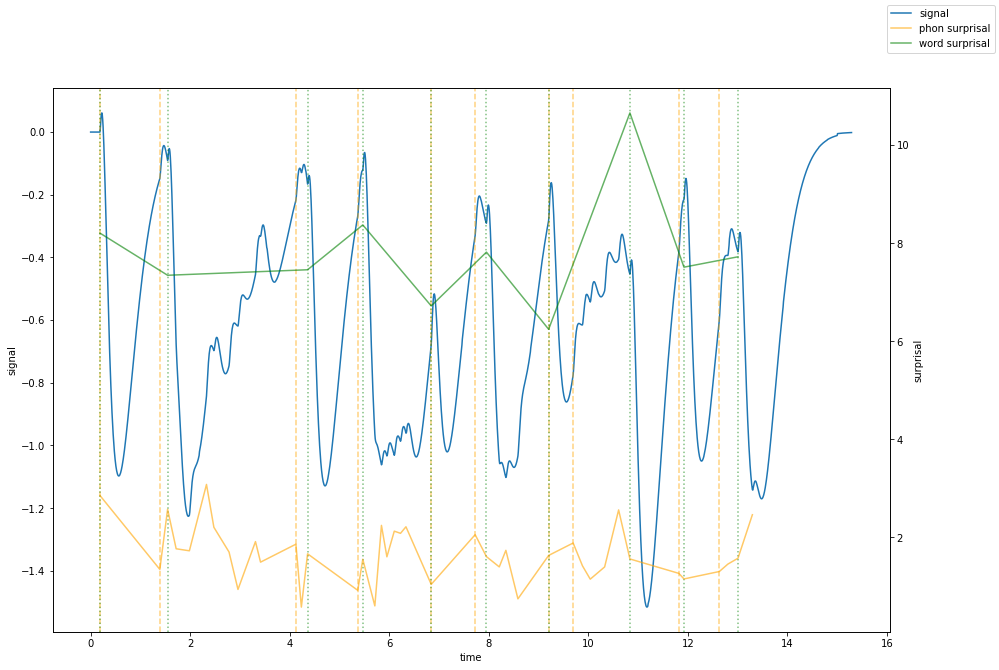

In [14]:
plt.subplots(figsize=(15, 10))
ax = sns.lineplot(data=y, x="time", y="signal")
twinx = ax.twinx()
sns.lineplot(data=X_phon, x="time", y="surprisal", color="orange", alpha=0.6, ax=twinx)
sns.lineplot(data=X_word, x="time", y="surprisal", color="green", alpha=0.6, ax=twinx)
ax.figure.legend(["signal", "phon surprisal", "word surprisal"])

word_onsets = X_phon.groupby("word_idx").apply(lambda xs: xs.iloc[0]).time
for onset in word_onsets:
    ax.axvline(onset, linestyle="--", color="orange", alpha=0.5)
for recognition_onset in X_word.time:
    ax.axvline(recognition_onset, linestyle=":", color="green", alpha=0.5)

## ERP recovery check

Would word-level and phoneme-level ERP succeed on a synthetic dataset? Let's try.

In [32]:
X_word, X_phon, y = syn.sample_dataset_with_phons(100)

100%|██████████| 100/100 [00:15<00:00,  6.34it/s]


In [33]:
X_word

time  recognition_point  surprisal
item word_idx                                         
0    0          0.429688                  2   7.195890
     1          2.296875                  4   6.701886
     2          3.687500                  1   6.565708
     3          5.023438                  1   9.609698
     4          5.710938                  0   8.650351
...                  ...                ...        ...
99   7         12.031250                  3   8.994440
     8         13.796875                  0   8.746854
     9         14.781250                  0   9.118279
     10        15.601562                  0   8.853500
     11        16.656250                  1   7.920241

[1710 rows x 3 columns]

In [34]:
X_phon

time  surprisal
item word_idx phon_idx                      
0    0        0          0.148438   2.475108
              1          0.312500   0.563062
              2          0.429688   1.886408
     1        0          1.406250   1.635019
              1          1.703125   1.562273
...                           ...        ...
99   11       1         16.656250   2.114248
              2         16.882812   1.364247
              3         17.148438   0.838190
              4         17.460938   2.641266
              5         17.734375   1.301098

[6774 rows x 2 columns]

In [35]:
y

time    signal
item sample_idx                     
0    0            0.000000  0.000000
     1            0.007812  0.000000
     2            0.015625  0.000000
     3            0.023438  0.000000
     4            0.031250  0.000000
...                    ...       ...
99   2521        19.695312 -0.009566
     2522        19.703125 -0.009266
     2523        19.710938 -0.008975
     2524        19.718750 -0.008693
     2525        19.726562 -0.008420

[354515 rows x 2 columns]

### Phoneme-level

In [36]:
EPOCH_WINDOW = (-1, 0.6)
TEST_WINDOW = (0.3, 0.5)

epoch_data = []
for (item, word_idx, phon_idx), x in tqdm(X_phon.iterrows(), total=len(X_phon)):
    y_df = y.loc[item]
    
    epoch_left, epoch_right = EPOCH_WINDOW
    epoch_window = y_df[(y_df.time >= x.time + epoch_left) & (y_df.time <= x.time + epoch_right)]
    
    baseline_window = epoch_window[epoch_window.time <= x.time]
    
    test_left, test_right = TEST_WINDOW
    test_window = epoch_window[(epoch_window.time >= x.time + test_left) & (epoch_window.time <= x.time + test_right)]
    
    # take means over temporal window
    baseline_window = baseline_window.signal.mean(axis=0)
    test_window = test_window.signal.mean(axis=0)
    
    epoch_data.append((item, word_idx, phon_idx, baseline_window, test_window))

  0%|          | 0/6774 [00:00<?, ?it/s]

In [37]:
epoch_df = pd.DataFrame(epoch_data, columns=["item", "word_idx", "phon_idx", "baseline_N400", "value_N400"]) \
    .set_index(["item", "word_idx", "phon_idx"])
epoch_df

baseline_N400  value_N400
item word_idx phon_idx                           
0    0        0              0.000000   -6.408577
              1             -0.300653  -10.770178
              2             -0.751343  -10.923706
     1        0             -7.319265   -2.813986
              1             -6.206941   -3.358867
...                               ...         ...
99   11       1             -8.595284  -12.132445
              2             -8.032259   -9.732802
              3             -7.955706   -6.450027
              4             -8.510789   -5.388811
              5             -9.030396   -3.914616

[6774 rows x 2 columns]

In [38]:
merged_df = pd.merge(epoch_df, X_phon, left_index=True, right_index=True)
merged_df["baselined_N400"] = merged_df.value_N400 - merged_df.baseline_N400
merged_df

baseline_N400  value_N400       time  surprisal  \
item word_idx phon_idx                                                    
0    0        0              0.000000   -6.408577   0.148438   2.475108   
              1             -0.300653  -10.770178   0.312500   0.563062   
              2             -0.751343  -10.923706   0.429688   1.886408   
     1        0             -7.319265   -2.813986   1.406250   1.635019   
              1             -6.206941   -3.358867   1.703125   1.562273   
...                               ...         ...        ...        ...   
99   11       1             -8.595284  -12.132445  16.656250   2.114248   
              2             -8.032259   -9.732802  16.882812   1.364247   
              3             -7.955706   -6.450027  17.148438   0.838190   
              4             -8.510789   -5.388811  17.460938   2.641266   
              5             -9.030396   -3.914616  17.734375   1.301098   

                        baselined_N400  
item word_idx phon_idx                  
0    0        0              -6.408577  
              1             -10.469525  
              2             -10.172363  
     1        0               4.505279  
              1               2.848075  
...                                ...  
99   11       1              -3.537161  
              2              -1.700544  
              3               1.505678  
              4               3.121978  
              5               5.115780  

[6774 rows x 5 columns]

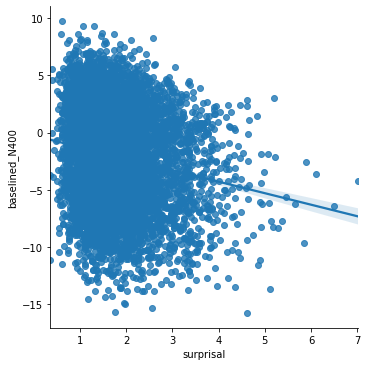

In [41]:
sns.lmplot(data=merged_df, x="surprisal", y="baselined_N400")

In [44]:
st.pearsonr(merged_df.surprisal, merged_df.baselined_N400)

(-0.17233333129566142, 2.5929965821128278e-46)

### Word-level

In [45]:
EPOCH_WINDOW = (-1, 0.6)
TEST_WINDOW = (0.3, 0.5)

epoch_data = []
for (item, word_idx), x in tqdm(X_word.iterrows(), total=len(X_word)):
    y_df = y.loc[item]
    
    epoch_left, epoch_right = EPOCH_WINDOW
    epoch_window = y_df[(y_df.time >= x.time + epoch_left) & (y_df.time <= x.time + epoch_right)]
    
    baseline_window = epoch_window[epoch_window.time <= x.time]
    
    test_left, test_right = TEST_WINDOW
    test_window = epoch_window[(epoch_window.time >= x.time + test_left) & (epoch_window.time <= x.time + test_right)]
    
    # take means over temporal window
    baseline_window = baseline_window.signal.mean(axis=0)
    test_window = test_window.signal.mean(axis=0)
    
    epoch_data.append((item, word_idx, baseline_window, test_window))

  0%|          | 0/1710 [00:00<?, ?it/s]

In [46]:
epoch_df = pd.DataFrame(epoch_data, columns=["item", "word_idx", "baseline_N400", "value_N400"]) \
    .set_index(["item", "word_idx"])
epoch_df

baseline_N400  value_N400
item word_idx                           
0    0             -0.751343  -10.923706
     1             -3.088208  -10.435149
     2             -4.484862  -11.476060
     3             -6.001194  -13.853170
     4             -8.333076  -12.737945
...                      ...         ...
99   7             -8.783457  -15.756798
     8             -7.125275  -10.732949
     9             -7.199062  -11.284797
     10            -7.576805  -12.433032
     11            -8.595284  -12.132445

[1710 rows x 2 columns]

In [47]:
merged_df = pd.merge(epoch_df, X_word, left_index=True, right_index=True)
merged_df["baselined_N400"] = merged_df.value_N400 - merged_df.baseline_N400
merged_df

baseline_N400  value_N400       time  recognition_point  \
item word_idx                                                            
0    0             -0.751343  -10.923706   0.429688                  2   
     1             -3.088208  -10.435149   2.296875                  4   
     2             -4.484862  -11.476060   3.687500                  1   
     3             -6.001194  -13.853170   5.023438                  1   
     4             -8.333076  -12.737945   5.710938                  0   
...                      ...         ...        ...                ...   
99   7             -8.783457  -15.756798  12.031250                  3   
     8             -7.125275  -10.732949  13.796875                  0   
     9             -7.199062  -11.284797  14.781250                  0   
     10            -7.576805  -12.433032  15.601562                  0   
     11            -8.595284  -12.132445  16.656250                  1   

               surprisal  baselined_N400  
item word_idx                             
0    0          7.195890      -10.172363  
     1          6.701886       -7.346941  
     2          6.565708       -6.991198  
     3          9.609698       -7.851977  
     4          8.650351       -4.404869  
...                  ...             ...  
99   7          8.994440       -6.973341  
     8          8.746854       -3.607674  
     9          9.118279       -4.085735  
     10         8.853500       -4.856227  
     11         7.920241       -3.537161  

[1710 rows x 6 columns]

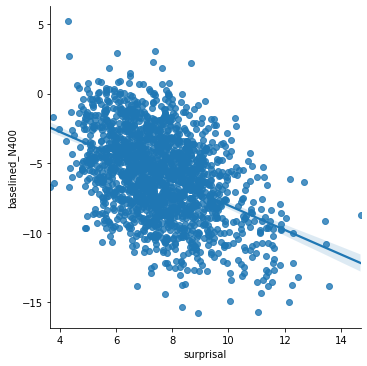

In [48]:
sns.lmplot(data=merged_df, x="surprisal", y="baselined_N400")

In [49]:
st.pearsonr(merged_df.surprisal, merged_df.baselined_N400)

(-0.4375988151901435, 6.39101040161557e-81)